In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_rt = pd.read_csv("Files/rt.movie_info.tsv.gz",sep="\t")
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


Cleaning Data

In [3]:
df_rt.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [4]:
df_rt[df_rt["studio"].isnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaN,NaN,NaN,NaN,92 minutes,NaN
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [10]:
df_clean = df_clean.fillna("Unkown")
df_clean

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",Unkown,Unkown,104 minutes,Unkown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",Unkown,Unkown,116 minutes,Unkown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",Unkown,Unkown,128 minutes,Unkown
4,7,Unkown,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unkown,Unkown,Unkown,Unkown,200 minutes,Unkown
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,Unkown,Unkown,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",Unkown,Unkown,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Unkown,"Jan 1, 1962","May 11, 2004",Unkown,Unkown,111 minutes,Unkown
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",Unkown,Unkown,101 minutes,Unkown


In [16]:
#getting a dataframe with studio names where box_office is not null
office_revenue = df_clean[df_clean["box_office"].notnull()]

office_revenue

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",Unkown,Unkown,104 minutes,Unkown
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",Unkown,Unkown,116 minutes,Unkown
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",Unkown,Unkown,128 minutes,Unkown
4,7,Unkown,NR,Drama|Romance,Rodney Bennett,Giles Cooper,Unkown,Unkown,Unkown,Unkown,200 minutes,Unkown
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,Unkown,Unkown,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",Unkown,Unkown,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Unkown,"Jan 1, 1962","May 11, 2004",Unkown,Unkown,111 minutes,Unkown
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",Unkown,Unkown,101 minutes,Unkown


In [12]:
#Removing commas from box office and converting to int
office_revenue["box_office"] = office_revenue["box_office"].str.replace(",","")
office_revenue["box_office"] = office_revenue["box_office"].astype("int64")


<ipython-input-12-c2b65fba8aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["box_office"] = office_revenue["box_office"].str.replace(",","")
<ipython-input-12-c2b65fba8aff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["box_office"] = office_revenue["box_office"].astype("int64")


In [13]:
#Converting studio to string
office_revenue["studio"] = office_revenue["studio"].astype("string")


<ipython-input-13-bcf3b0c71674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["studio"] = office_revenue["studio"].astype("string")


In [14]:
office_revenue.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office       int64
runtime         object
studio          string
dtype: object

In [17]:
office_revenue["studio"]

0                  Unkown
1       Entertainment One
2                  Unkown
3                  Unkown
4                  Unkown
              ...        
1555      New Line Cinema
1556    Paramount Vantage
1557               Unkown
1558               Unkown
1559    Columbia Pictures
Name: studio, Length: 1560, dtype: object

In [10]:
#office_revenue["box_office"]

Text(0, 0.5, 'Box Office')

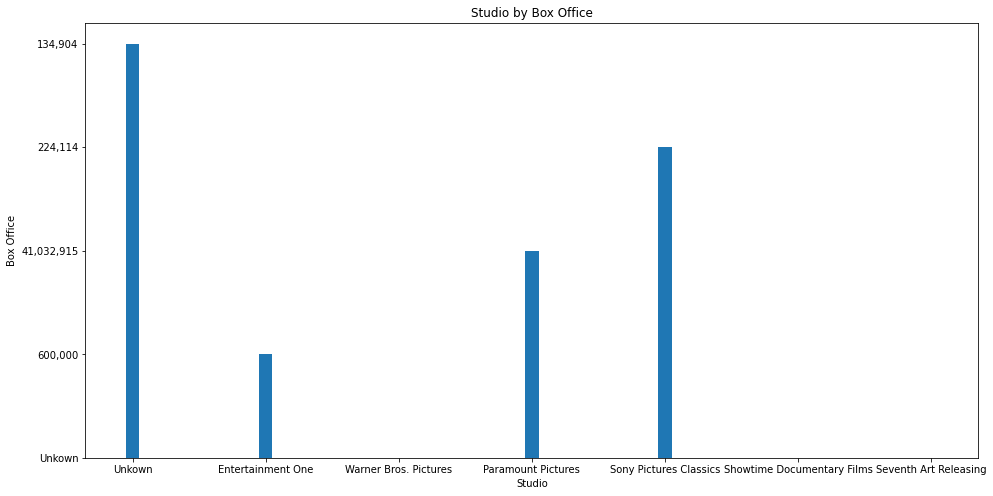

In [18]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Graph X vs height as a bar graph
x = office_revenue["studio"].head(15)
y = office_revenue["box_office"].head(15)
ax.bar(x, y, width =0.1)

# Set title
ax.set_title("Studio by Box Office")

# Set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

In [19]:
boxoffice_total = (office_revenue.groupby("studio")).sum()

boxoffice_total = boxoffice_total.drop("id", axis=1)
boxoffice_total.head()

""
studio
20th Century Fox
20th Century Fox Film Corporat
A24
A24 Films
A24 and DIRECTV


In [19]:
boxoffice_total.reset_index(inplace= True)

Text(0, 0.5, 'Box Office')

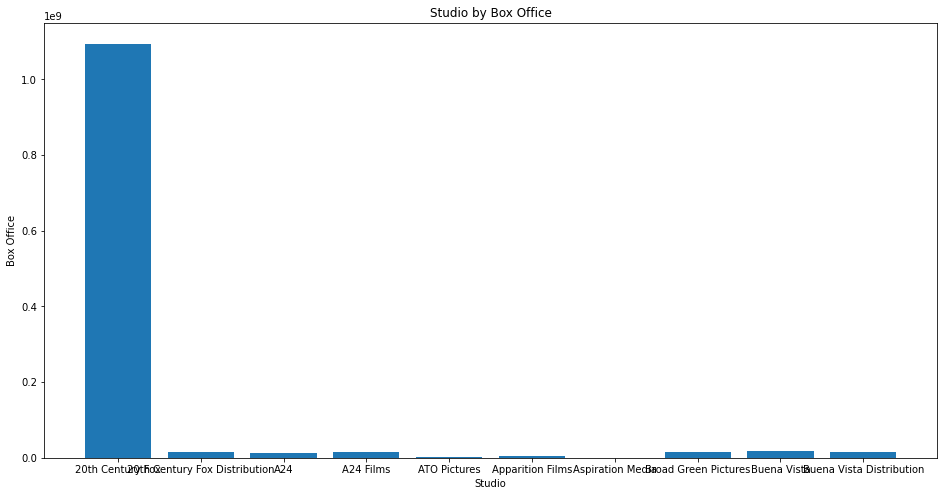

In [22]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Graph X vs height as a bar graph
x = boxoffice_total["studio"].head(10)
y = boxoffice_total["box_office"].head(10)
ax.bar(x, y)

# Set title
ax.set_title("Studio by Box Office")

# Set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

Genre by Box Office

In [14]:
genre_var = df_rt[office_revenue["genre"]]

genre_var

#genre_total = (office_revenue.groupby("genre")).sum()

KeyError: "None of [Index(['Drama|Science Fiction and Fantasy', 'Comedy', 'Drama', 'Drama',\n       'Comedy|Drama|Mystery and Suspense', 'Drama',\n       'Action and Adventure|Drama|Science Fiction and Fantasy',\n       'Art House and International|Comedy|Drama|Musical and Performing Arts',\n       'Drama', 'Drama',\n       ...\n       'Comedy|Drama', 'Animation|Kids and Family', 'Comedy|Drama',\n       'Drama|Romance', 'Action and Adventure|Art House and International',\n       'Action and Adventure|Science Fiction and Fantasy', 'Comedy|Drama',\n       'Horror|Mystery and Suspense',\n       'Art House and International|Comedy|Drama',\n       'Action and Adventure|Horror|Mystery and Suspense'],\n      dtype='object', length=340)] are in the [columns]"